In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

In [3]:
df_classical = pd.read_csv('classical.csv').drop('Unnamed: 0', axis=1)
df_country = pd.read_csv('country.csv').drop('Unnamed: 0', axis=1)
df_electronic = pd.read_csv('electronic.csv').drop('Unnamed: 0', axis=1)
df_hiphop = pd.read_csv('hip_hop.csv').drop('Unnamed: 0', axis=1)
df_indie = pd.read_csv('indie.csv').drop('Unnamed: 0', axis=1)
df_metal = pd.read_csv('metal.csv').drop('Unnamed: 0', axis=1)
df_jazz = pd.read_csv('jazz.csv').drop('Unnamed: 0', axis=1)
df_latin = pd.read_csv('latin.csv').drop('Unnamed: 0', axis=1)
df_pop = pd.read_csv('pop.csv').drop('Unnamed: 0', axis=1)
df_rb = pd.read_csv('rb.csv').drop('Unnamed: 0', axis=1)
df_rock = pd.read_csv('rock.csv').drop('Unnamed: 0', axis=1)
df_seasonal = pd.read_csv('seasonal.csv').drop('Unnamed: 0', axis=1)
df_funk = pd.read_csv('funk.csv').drop('Unnamed: 0', axis=1)
df_show_tune = pd.read_csv('show_tune.csv').drop('Unnamed: 0', axis=1)

frames = [df_classical, df_country, df_electronic, df_hiphop, df_indie, df_metal, df_jazz, df_latin, df_pop, df_rb, df_rock, df_seasonal, df_funk, df_show_tune]
df_final = pd.concat(frames)

In [4]:
#check everything out 
df_final.head()

track  \
0                                  Full Moon - Day 3   
1  Violin Sonata No. 4 in A Minor, Op. 23: III. A...   
2  Hedwig's Theme - From "Harry Potter And The Ph...   
3                                 Light of the Seven   
4  Symphony No. 6 in B Minor, Op. 74 "Pathétique"...   

                     artist  \
0          Ludovico Einaudi   
1      Ludwig van Beethoven   
2             John Williams   
3             Ramin Djawadi   
4  Pyotr Ilyich Tchaikovsky   

                                               album  popularity    time  \
0                         Seven Days Walking (Day 3)          58  218680   
1               Beethoven: Violin Sonatas Nos. 4 & 9          35  336060   
2                                     Hedwig's Theme          54  239916   
3  Game of Thrones (Music from the HBO® Series - ...          69  589094   
4           Tchaikovsky: Symphony No. 6 "Pathétique"          53  526734   

  release_date  track_number  danceability  energy  key  loudness  mode  \
0   2019-05-17             9         0.169  0.0156    0   -35.316     0   
1   2019-05-24             3         0.352  0.1500    9   -18.498     0   
2   2019-05-10             1         0.360  0.2080    4   -17.094     0   
3   2016-06-24             3         0.273  0.1020    0   -16.843     0   
4   2019-05-10             3         0.481  0.3020    7   -18.133     1   

   speechiness  acoustincess  instrumentalness  liveness  valence    tempo  \
0       0.0428         0.993            0.9730    0.0953   0.0868  101.177   
1       0.0473         0.942            0.0298    0.1080   0.1440  140.334   
2       0.0524         0.922            0.2290    0.4800   0.1680  148.347   
3       0.0494         0.903            0.7210    0.2680   0.0583  120.378   
4       0.0440         0.923            0.9050    0.2030   0.2770   80.988   

   time_signature      genre  
0               4  classical  
1               4  classical  
2               4  classical  
3               4  classical  
4               4  classical

In [5]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9604 entries, 0 to 747
Data columns (total 20 columns):
track               9602 non-null object
artist              9602 non-null object
album               9602 non-null object
popularity          9604 non-null int64
time                9604 non-null int64
release_date        9604 non-null object
track_number        9604 non-null int64
danceability        9604 non-null float64
energy              9604 non-null float64
key                 9604 non-null int64
loudness            9604 non-null float64
mode                9604 non-null int64
speechiness         9604 non-null float64
acoustincess        9604 non-null float64
instrumentalness    9604 non-null float64
liveness            9604 non-null float64
valence             9604 non-null float64
tempo               9604 non-null float64
time_signature      9604 non-null int64
genre               9604 non-null object
dtypes: float64(9), int64(6), object(5)
memory usage: 1.5+ MB


In [7]:
#find if there are duplicates
df_final.duplicated

<bound method DataFrame.duplicated of                                                  track  \
0                                    Full Moon - Day 3   
1    Violin Sonata No. 4 in A Minor, Op. 23: III. A...   
2    Hedwig's Theme - From "Harry Potter And The Ph...   
3                                   Light of the Seven   
4    Symphony No. 6 in B Minor, Op. 74 "Pathétique"...   
5      Bagatelle No. 25 in A Minor, WoO 59 "Für Elise"   
6    Cantabile, MS 109/Op. 17 (Arr. for Cello and G...   
7    Schumann: Widmung, Op. 25 No. 1 (Arr. Liszt, S...   
8                    Golden Butterflies Var. 1 - Day 2   
9    Trio in D Minor, Op. 63: I. Mit Energie und Le...   
10   Holst: The Planets, Op. 32: I. Mars, the Bring...   
11                                         Etude No. 2   
12          I. Lento—Sostenuto tranquillo ma cantabile   
13   Deux Arabesques, L. 66: 1. Andantino con moto ...   
14                                             Minerva   
15   Organ Sonata No. 4, BWV 528: 

In [8]:
#drop duplicates 
df_final.drop_duplicates(inplace=True)

In [9]:
#convert miliseconds to seconds
df_final['time'] = df_final['time']//1000

In [10]:
#change the release date so that it is only the release year 
date_list = [date[0:4] for date in df_final['release_date']]
df_final['release_date'] = date_list  

In [11]:
#create a list of distinct genres
attribute_list = ['danceability', 'energy', 'key', 'loudness', 'mode',
                                                'speechiness', 'acoustincess', 'instrumentalness', 'liveness',
                                                'valence', 'tempo', 'time_signature', 'danceability']

Visualization 

Text(0, 0.5, 'Genre')

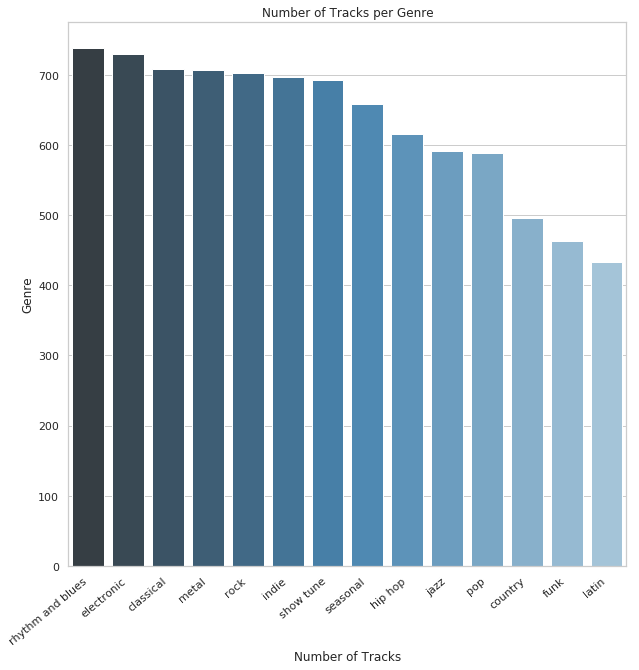

In [12]:
#Barplot to show the number of tracks per 
df_genre = df_final.groupby('genre').count().reset_index().sort_values(by='track', ascending=False)
fig = plt.figure(figsize = (10, 10))
sns.set(style="whitegrid")
ax = sns.barplot(x='genre', y='track', data=df_genre, palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Number of Tracks per Genre')
ax.set_xlabel('Number of Tracks')
ax.set_ylabel('Genre')

Text(0, 0.5, 'Genre')

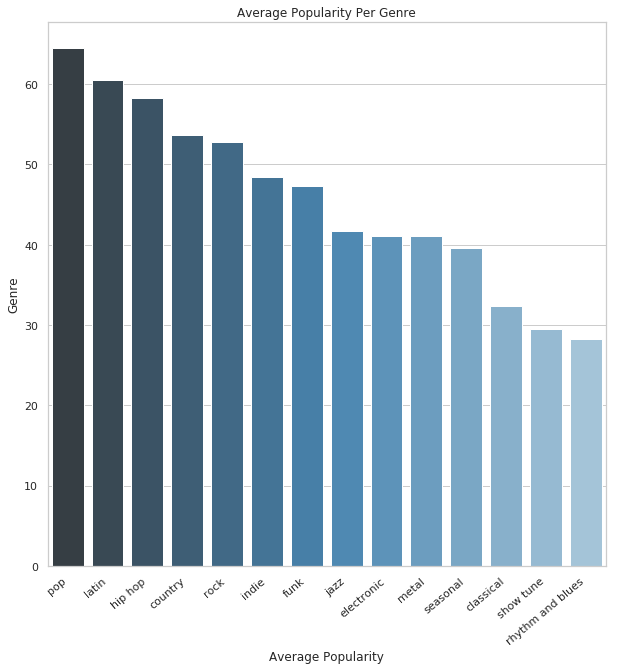

In [13]:
#which genre has the highest average popularity 
df_sum_pop = df_final.groupby('genre').sum().reset_index()[['genre', 'popularity']]
df_count_pop = df_final.groupby('genre').count().reset_index()[['genre', 'popularity']]

merged_inner = df_sum_pop.merge(right=df_count_pop, left_on='genre', right_on='genre')
merged_inner['average_popularity'] = merged_inner['popularity_x'] / merged_inner['popularity_y']
chart_val = merged_inner.sort_values(by='average_popularity', ascending=False)[['genre', 'average_popularity']]
chart_val

#chart average popularity by genre
fig = plt.figure(figsize = (10, 10))
sns.set(style="whitegrid")
ax = sns.barplot(x='genre', y='average_popularity', data=chart_val, palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Average Popularity Per Genre')
ax.set_xlabel('Average Popularity')
ax.set_ylabel('Genre')

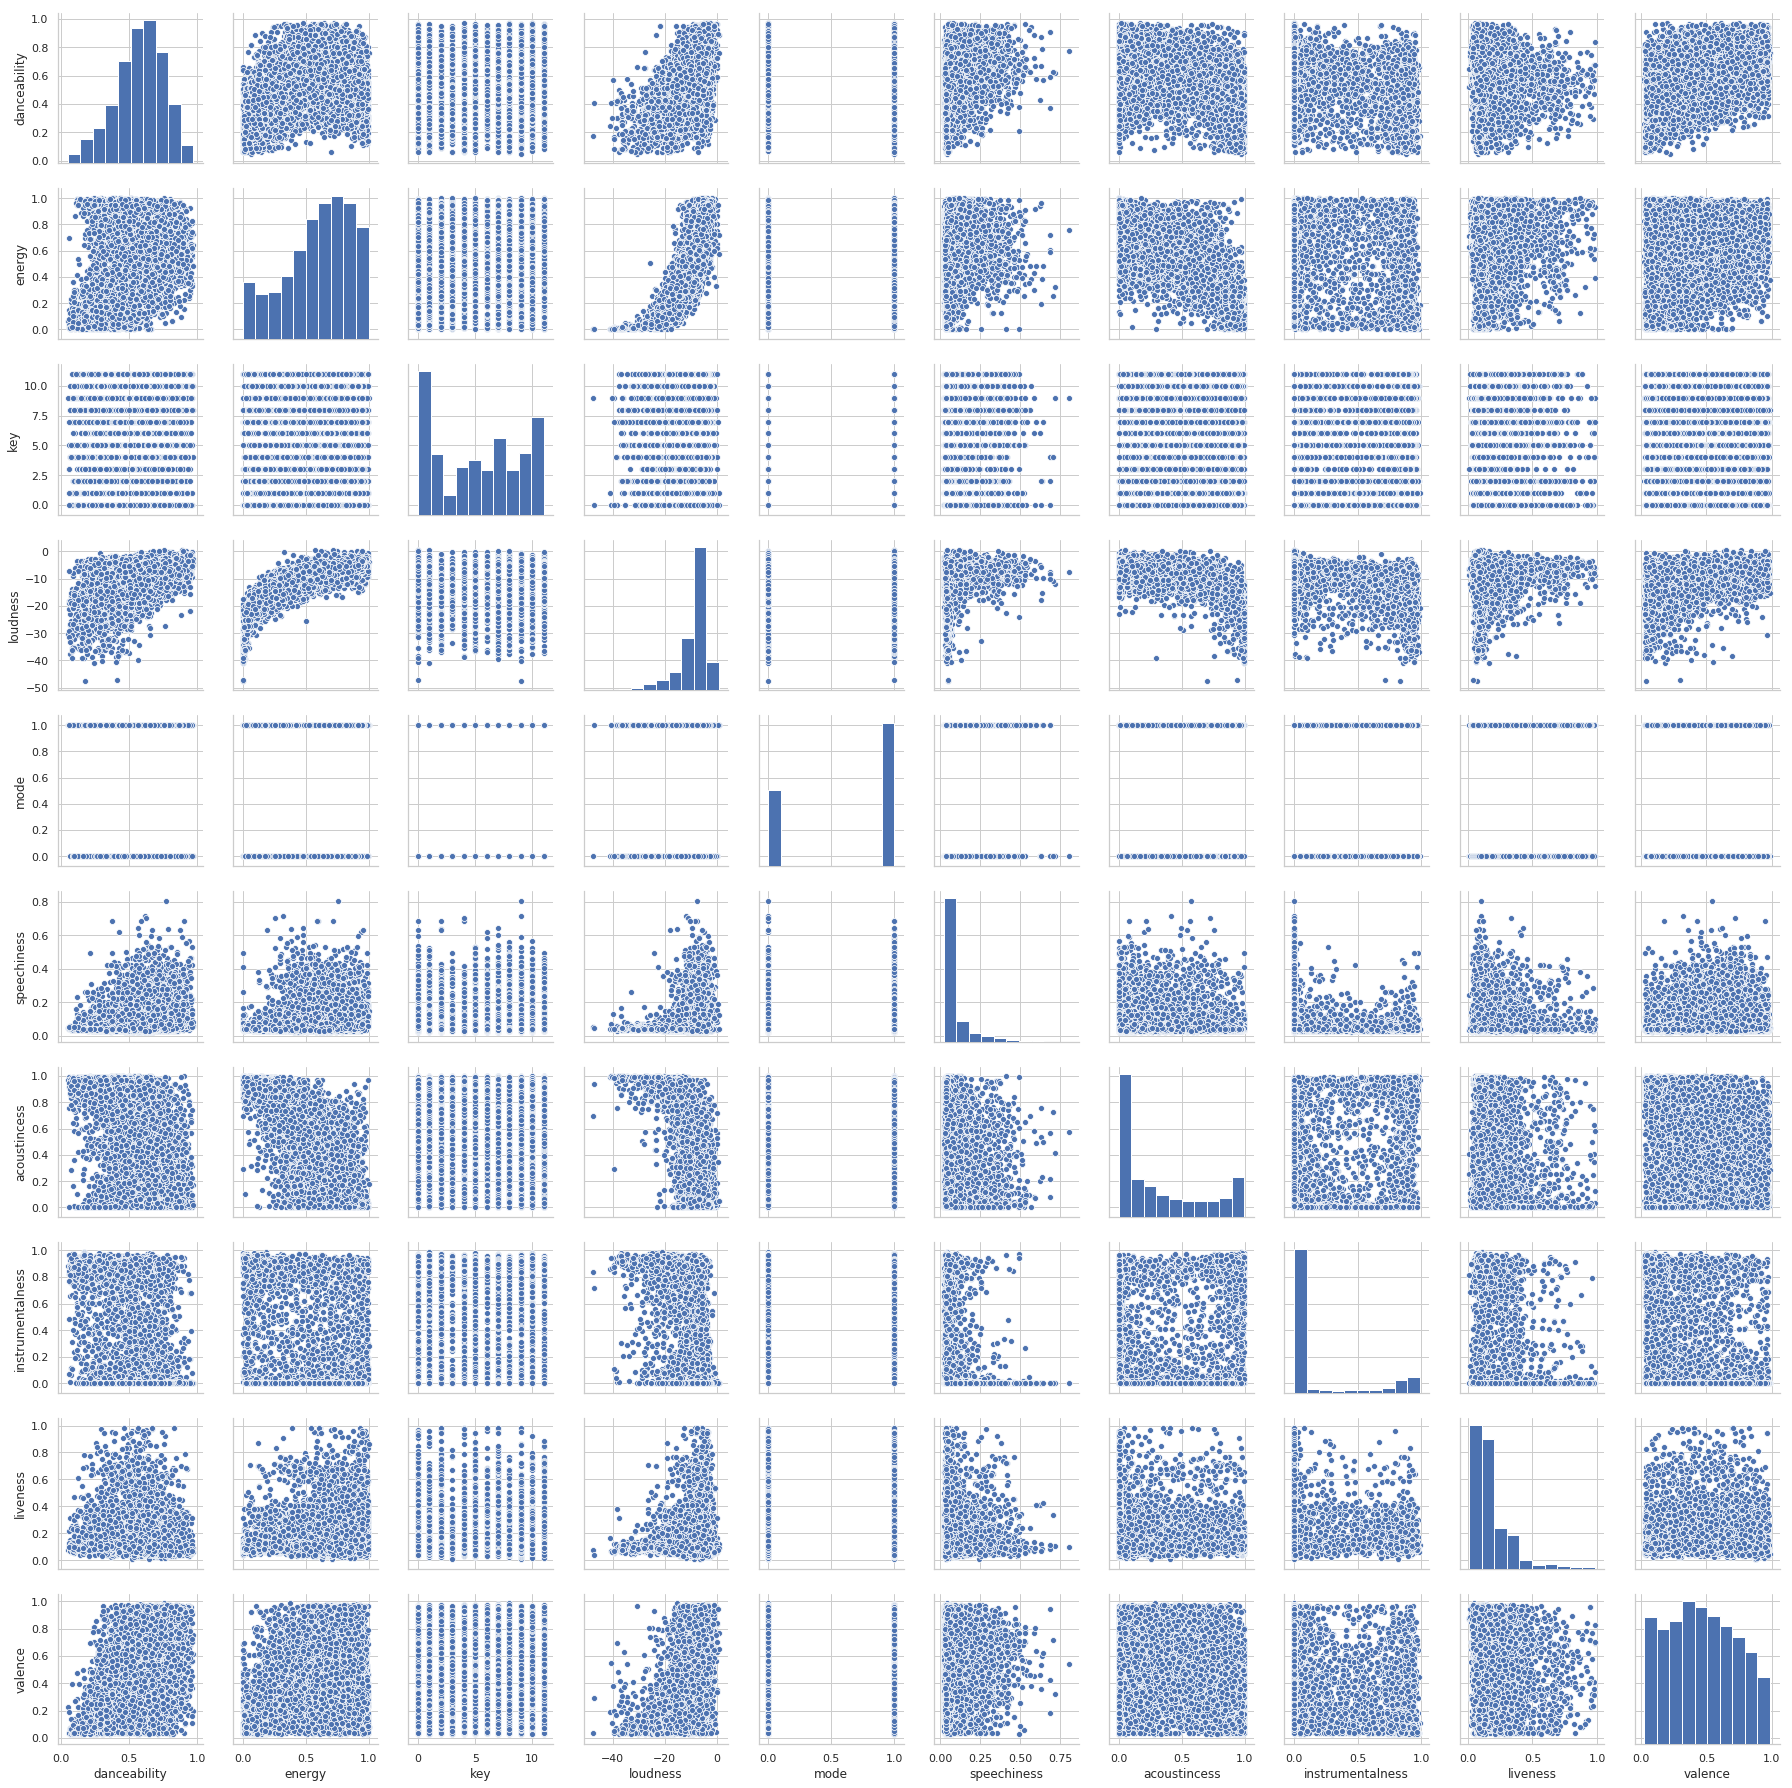

In [14]:
df_pairplot = df_final.iloc[:, 7:17]
sns.pairplot(df_pairplot)

/home/jrsilber/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Frequency')

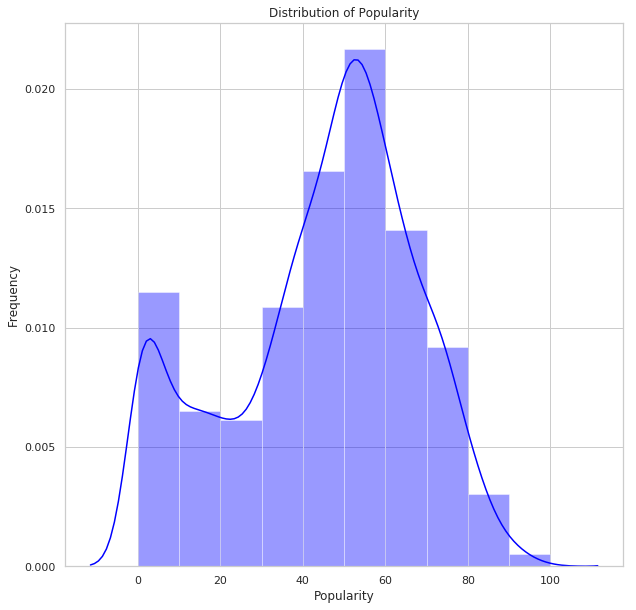

In [15]:
# Histogram showing the most popular songs (>90) shaded in 
# what does the kde line mean? 
fig = plt.figure(figsize = (10, 10))
sns.set(style="whitegrid")
ax = sns.distplot(df_final.popularity, bins=10, color='blue')
ax.set_title('Distribution of Popularity')
ax.set_xlabel('Popularity')
ax.set_ylabel('Frequency')

In [16]:
# sns.pairplot(df_final[['popularity', 'release_date']])

Proportion of songs with a popularity rating of 90 or more: '0.49'%


/home/jrsilber/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


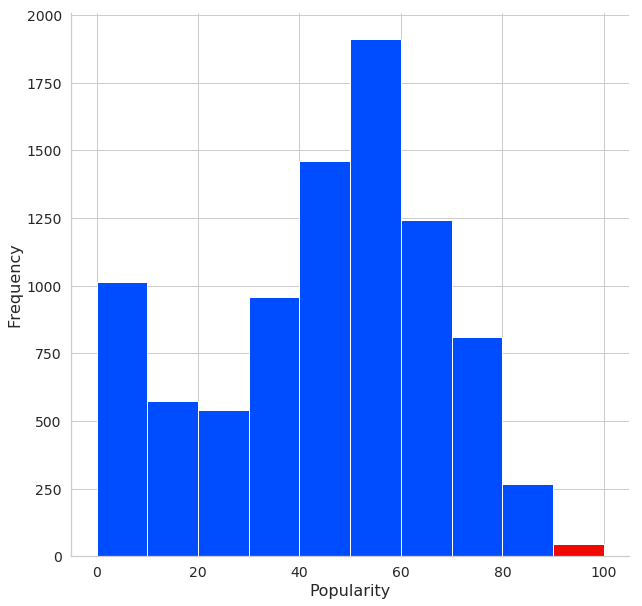

In [17]:
df_really_popular = df_final.query('popularity >= 90')
pop_proportion = len(df_really_popular)/len(df_final) *100
print("Proportion of songs with a popularity rating of 90 or more: '{}'%".format(str(pop_proportion)[0:4]))
fig = plt.figure(figsize = (10, 10))
N, bins, patches = plt.hist(df_final['popularity'], 10)

cmap = plt.get_cmap('jet')
below = cmap(0.2)
above =cmap(0.9)

for i in range(0,9):
    patches[i].set_facecolor(below)
for i in range(9, 10):
    patches[i].set_facecolor(above)

plt.xlabel("Popularity", fontsize=16)  
plt.ylabel("Frequency", fontsize=16)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.show()

energy 0.10246551811635785
key -0.0003577800032696231
loudness 0.2133103895895865
mode 0.00642280124788191
speechiness 0.09862942096722851
acoustincess -0.1625903407798592
instrumentalness -0.2148087639833725
liveness -0.06055310890287702
valence 0.08651735102204645
tempo 0.02338872432622844
time_signature 0.06371966443429973
danceability 0.21523820878622782


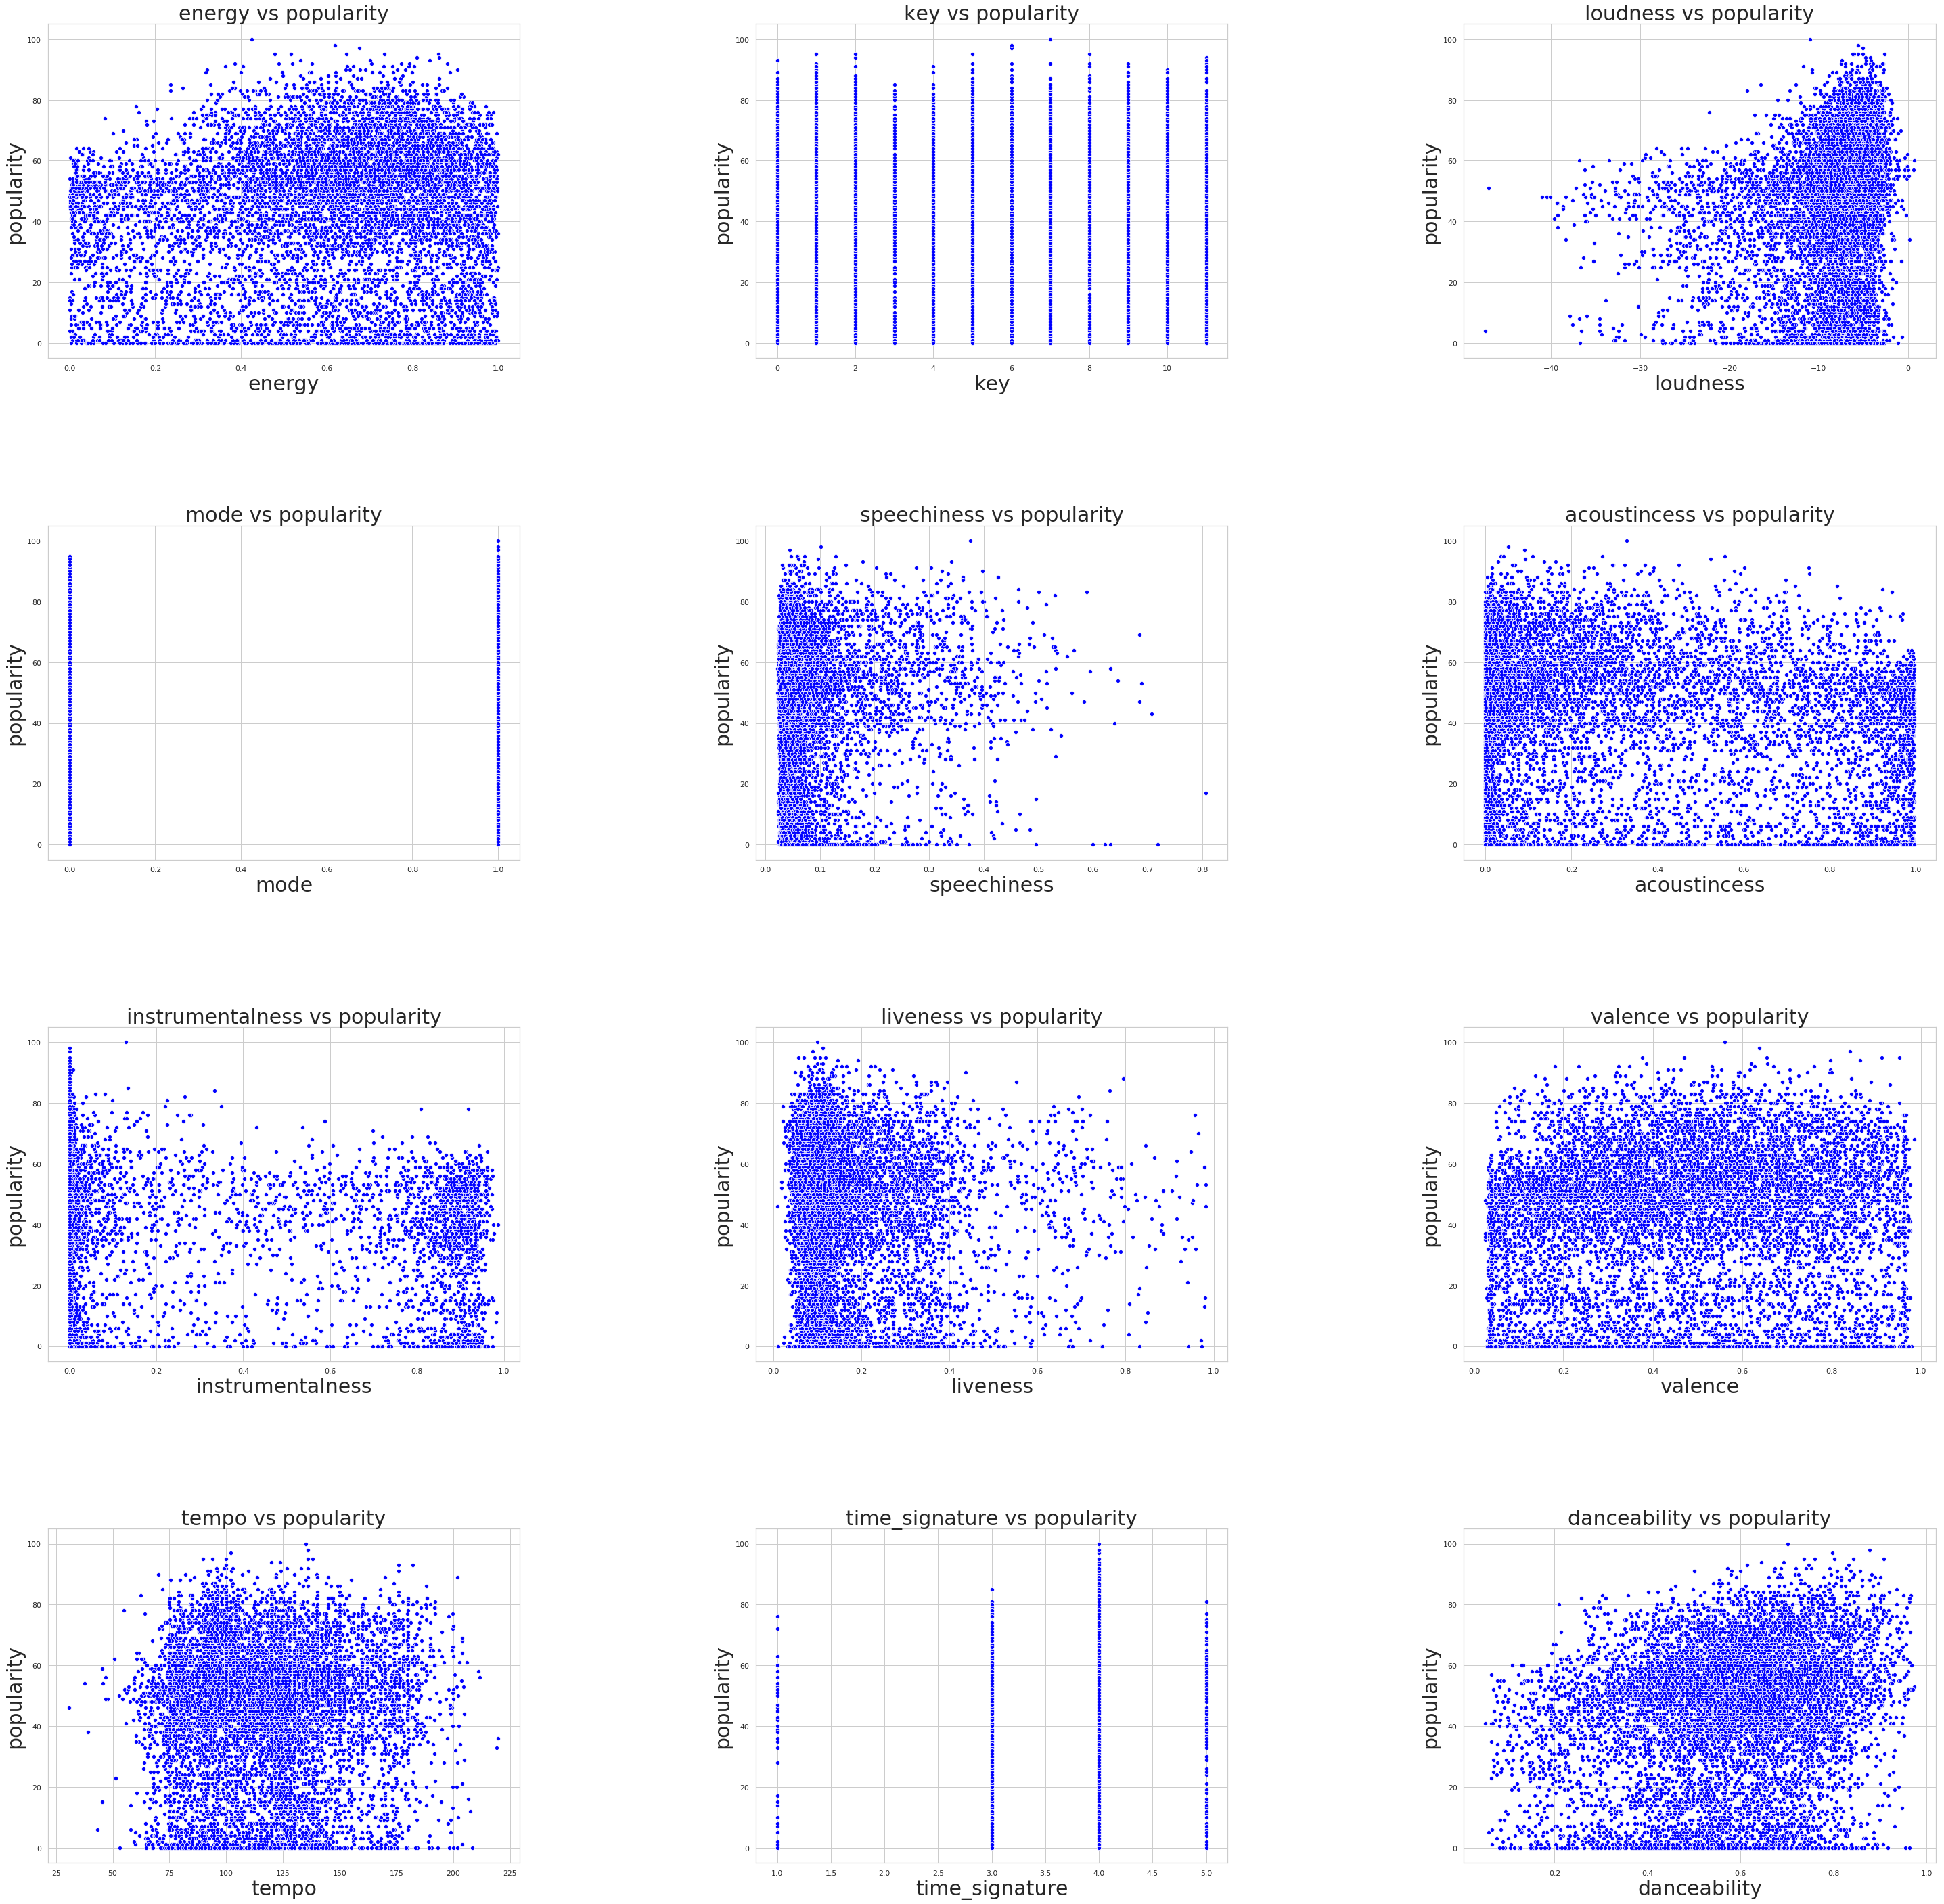

In [18]:
#create scatterplots of all attributes vs. popularity
fig = plt.figure(figsize = (50, 50))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, len(attribute_list)):
    ax = fig.add_subplot(4, 3, i)
    x = df_final[attribute_list[i]]
    y = df_final['popularity']
    sns.scatterplot(x, y, color='blue')
    ax.set_ylabel('popularity', fontsize=30)
    ax.set_xlabel(attribute_list[i], fontsize=30)
    ax.set_title(str(attribute_list[i]) + ' ' + 'vs popularity', fontsize=30)
    print(attribute_list[i], linregress(x, y)[2])

In [19]:
#create a dataframe for genre
df_pop = df_final.query("genre == 'pop'")

energy 0.009335991182216579
key -0.014586478145277392
loudness 0.0634729392756314
mode -0.016649197271855175
speechiness 0.13516667565642507
acoustincess -0.03453500236537223
instrumentalness 0.06701977057209672
liveness -0.023908232777096094
valence 0.027950384174874107
tempo -0.06794612005314313
time_signature 0.028412628306942245
danceability 0.17820952974981227


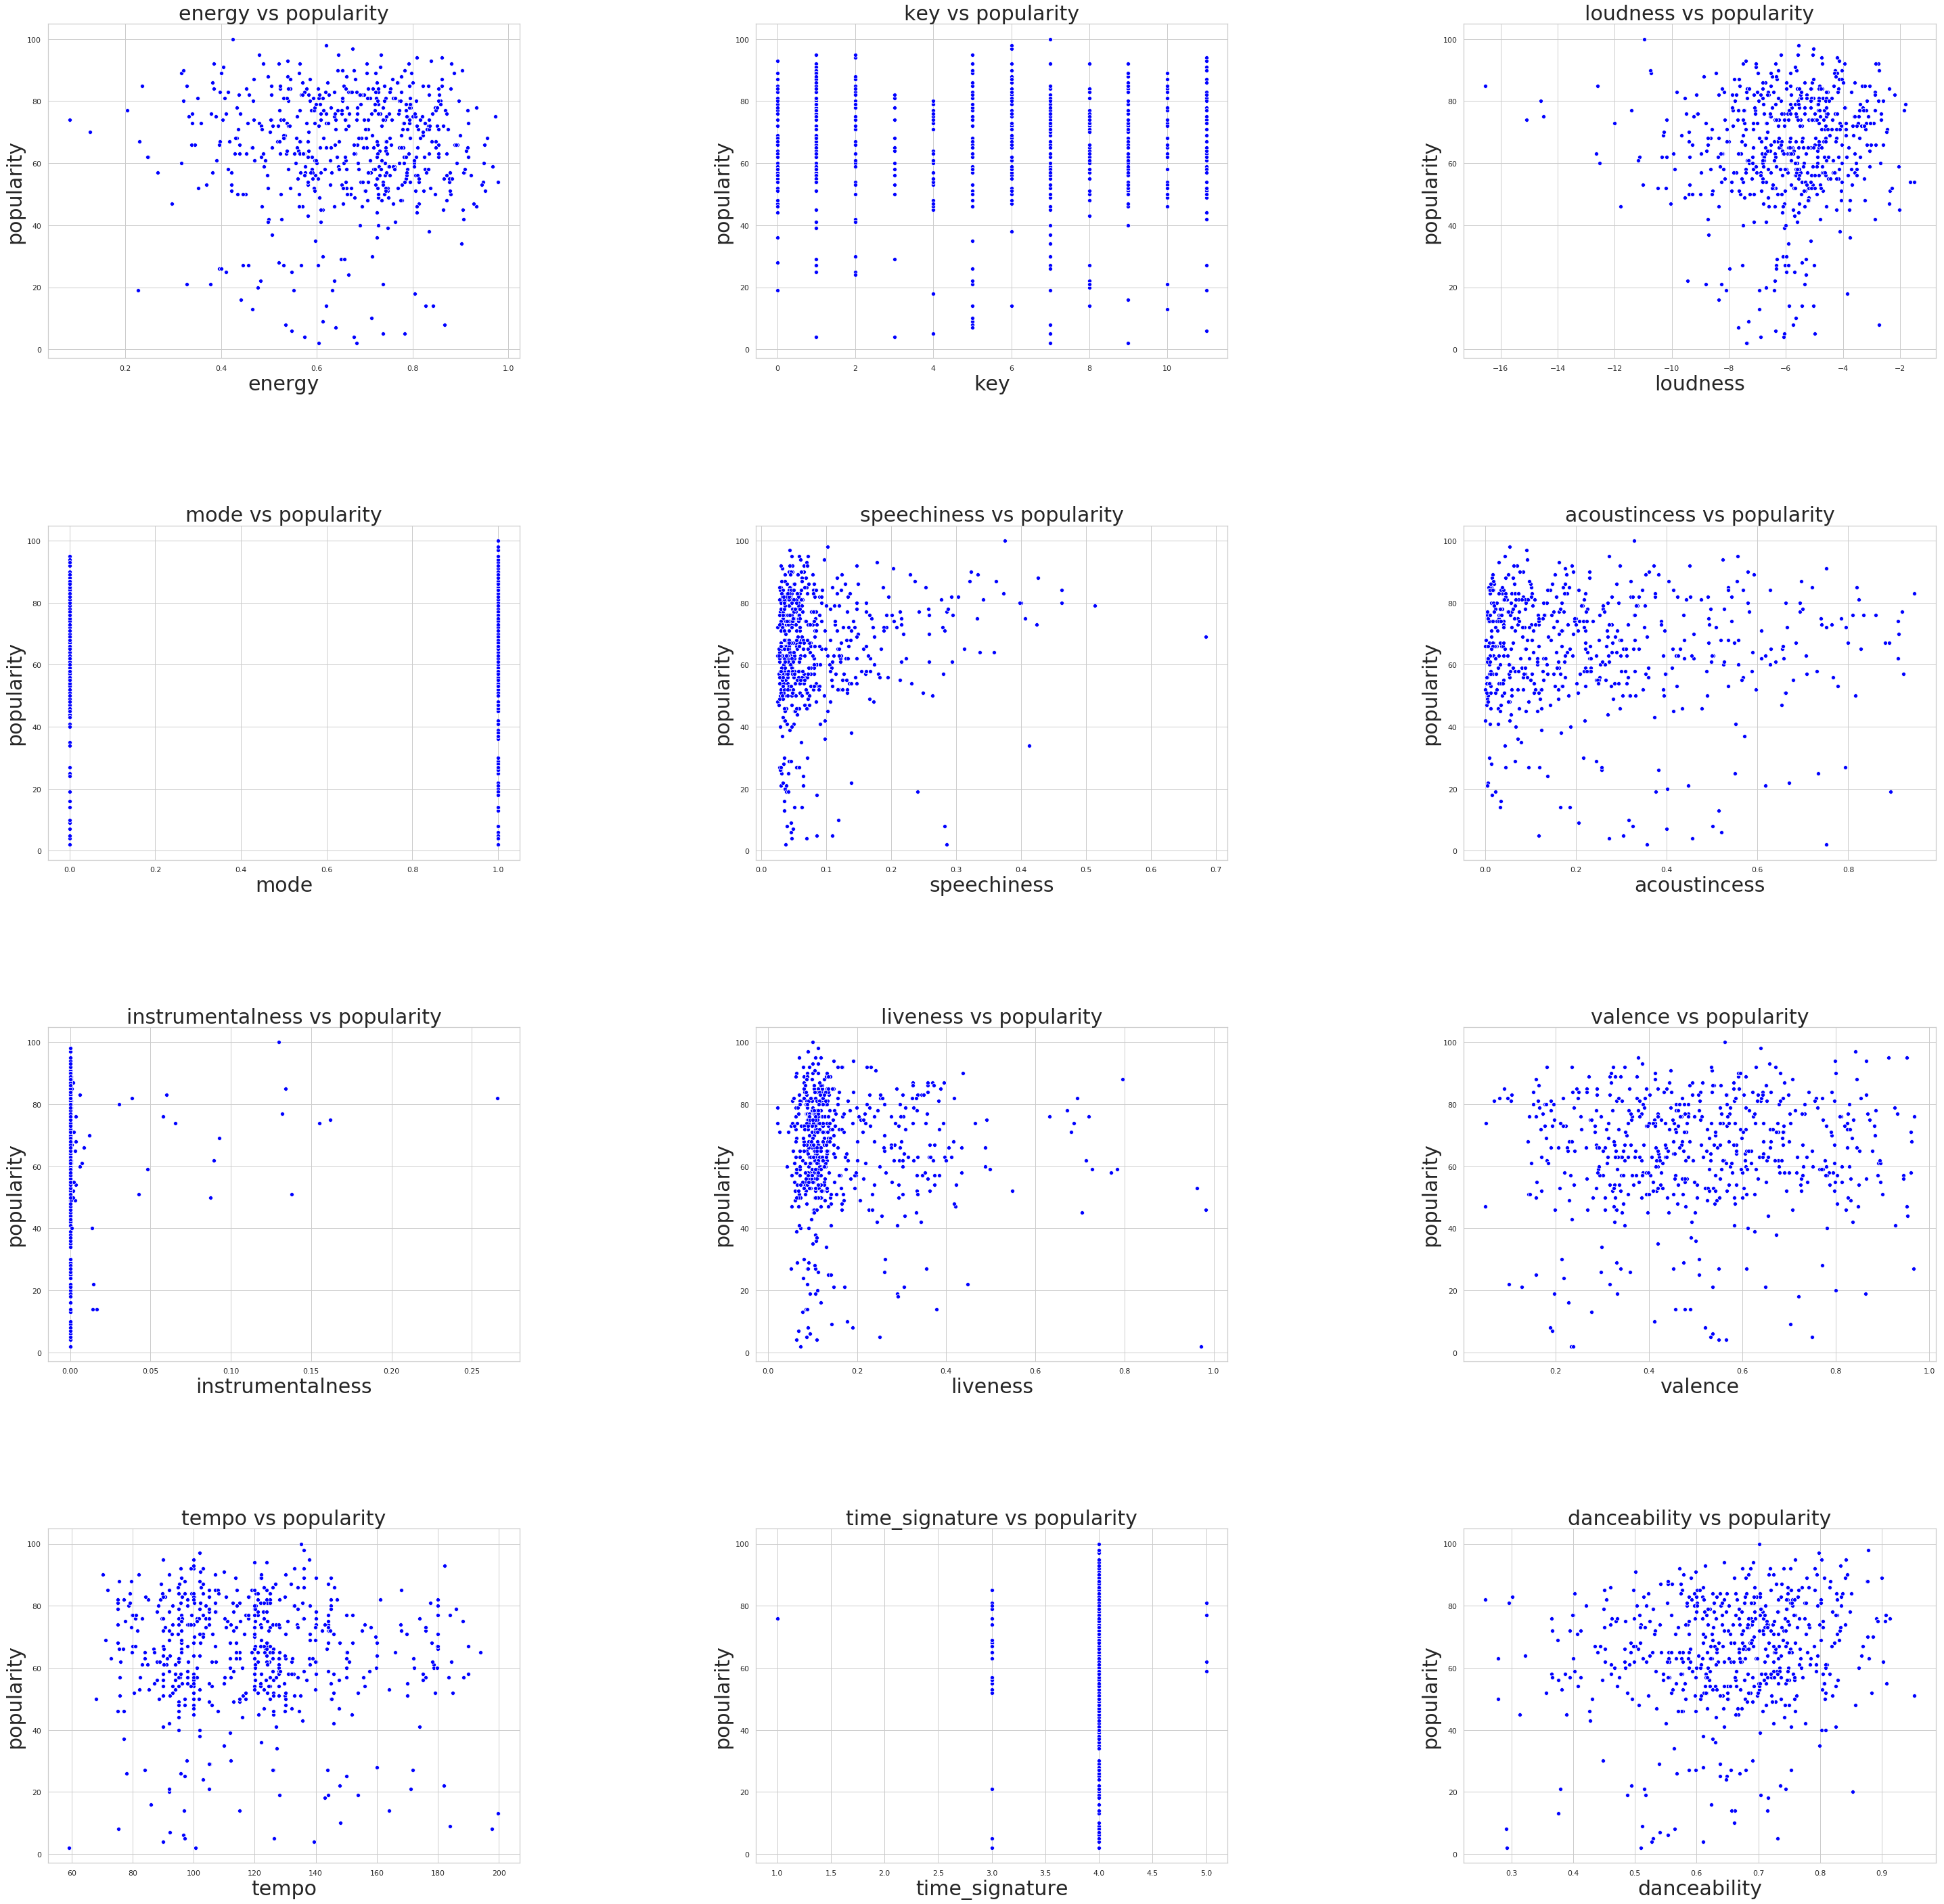

In [20]:
#create scatterplots of all attributes vs. popularity
fig = plt.figure(figsize = (50, 50))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, len(attribute_list)):
    ax = fig.add_subplot(4, 3, i)
    x = df_pop[attribute_list[i]]
    y = df_pop['popularity']
    sns.scatterplot(x, y, color='blue')
    ax.set_ylabel('popularity', fontsize=30)
    ax.set_xlabel(attribute_list[i], fontsize=30)
    ax.set_title(str(attribute_list[i]) + ' ' + 'vs popularity', fontsize=30)
    print(attribute_list[i], linregress(x, y)[2])

8823